In [1]:
import pandas as pd
import numpy as np

In [2]:
features = pd.read_csv('temps.csv')
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [3]:
features.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend'],
      dtype='object')

In [4]:
features.drop(['forecast_noaa', 'forecast_acc', 'forecast_under'],axis=1,inplace=True)

In [5]:
##Explaination
'''
->year: 2016 for all data points

->month: number for month of the year

->day: number for day of the year

->week: day of the week as a character string

->temp_2: max temperature 2 days prior

->temp_1: max temperature 1 day prior

->average: historical average max temperature

->actual: max temperature measurement
friend: your friend’s prediction, a random number between 20 below the average and 20 above the average
'''

'\n->year: 2016 for all data points\n\n->month: number for month of the year\n\n->day: number for day of the year\n\n->week: day of the week as a character string\n\n->temp_2: max temperature 2 days prior\n\n->temp_1: max temperature 1 day prior\n\n->average: historical average max temperature\n\n->actual: max temperature measurement\nfriend: your friend’s prediction, a random number between 20 below the average and 20 above the average\n'

In [6]:
features.shape

(348, 9)

In [7]:
null_values = features.columns[features.isnull().any()]
features[null_values].isnull().sum()

Series([], dtype: float64)

In [8]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000


In [9]:
##use date time for dealing with dates
import datetime

##get 'year','months','days'
years = features['year']
months = features['month']
days = features['day']

In [10]:
##list and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year,month,day in zip(years,months,days)]
dates = [datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('fivethirtyeight')

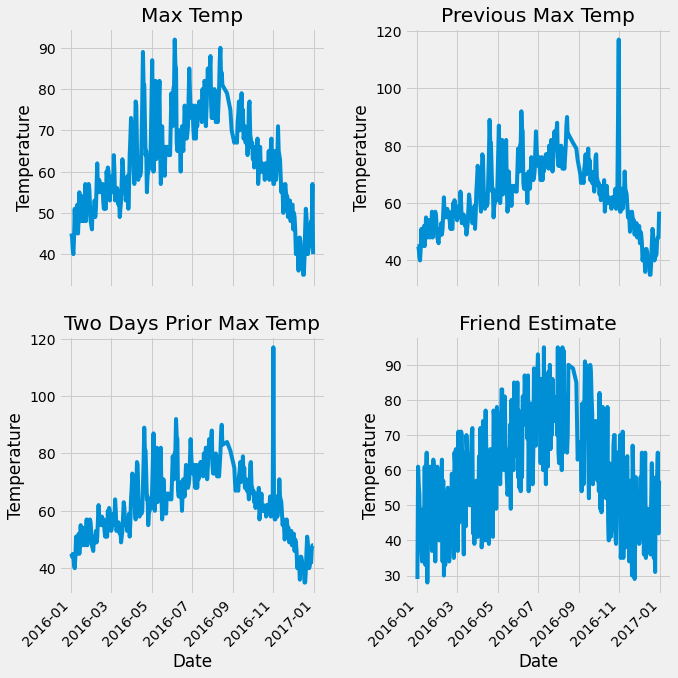

In [12]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
fig.autofmt_xdate(rotation=45)

##actual max temperature measurement
ax1.plot(dates,features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature');ax1.set_title('Max Temp')

##temperature from 1 day ago
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

##Temperature from 2 days ago
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

##Friend Estimate
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

## Data Preparation
## One Hot Encoding

In [13]:
features = pd.get_dummies(features)
features.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [14]:
features.shape

(348, 15)

## Features, labels,Convert Data to Arrays

In [15]:
##Use numpy to convert to array

##Labels are the values we want to predict
labels = np.array(features['actual'])

##Remove labels from features
features = features.drop('actual',axis = 1)

In [16]:
features.head()

,year,month,day,temp_2,temp_1,average,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,41,0,0,0,0,0,1,0


In [17]:
##Saving feature names for latter use
feature_list = list(features.columns)

##Convert to numpy array
features = np.array(features)

## Training and Testing sets

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [19]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 14)
Training Labels Shape: (261,)
Testing Features Shape: (87, 14)
Testing Labels Shape: (87,)


## Establish Baseline

In [20]:
##Baseline prediction are the historical avgs
baseline_preds = test_features[:,feature_list.index('average')]

##Baseline errors, display avg baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average Baseline Error: ', round(np.mean(baseline_errors),2),'degrees.')

Average Baseline Error:  5.06 degrees.


## Train Model

In [21]:
from sklearn.ensemble import RandomForestRegressor

##Initiate model
rf = RandomForestRegressor(n_estimators=1000,random_state=42)

##Train model on training data
rf.fit(train_features,train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

## Make predictions on Test set

In [22]:
## Use forest's predict method on test data
predictions = rf.predict(test_features)

##Calculate the absolute errors
errors = abs(predictions - test_labels)

##Mean Absolute Error
print('Mean Absolute Error: ', round(np.mean(errors),2),'degrees.')

Mean Absolute Error:  3.83 degrees.


## Determine Performance Metrics

In [23]:
##MAE Percentage error calculate
mape = 100 * (errors / test_labels)

##Calculate and display Accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(accuracy,2), '%.')

Accuracy:  93.98 %.


In [24]:
##Create model with different hyperparameters to try and boost performance. The only way to find the best ones are try a few and evaluate them!!
rf_new = RandomForestRegressor(n_estimators = 100,criterion='mse',max_depth=None,min_samples_split=2,min_samples_leaf=1)

## Interpret Model Results
## Visualizing a Single Decision Tree

In [29]:
##Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

##Pull out one tree from the forest
tree = rf.estimators_[5]

##Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

##Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

##Write graph to a png file
graph.write_png('tree.png');

In [30]:
print("The depth of this tree is: ", tree.tree_.max_depth)

The depth of this tree is:  15


In [31]:
##Smaller tree for visualization

##Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10,
                                max_depth=3,
                                random_state=42)
rf_small.fit(train_features,train_labels)

##Extract small tree
tree_small = rf_small.estimators_[5]

##Save the tree as a png image
export_graphviz(tree_small,
               out_file='small_tree.dot',
               feature_names=feature_list,
               rounded=True,
               precision=1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png')

## Variable Importance

In [32]:
##Get numerical feature importance
importance = list(rf.feature_importances_)

In [34]:
##List of tuples with variables and importance
feature_importance = [(features, round(importance,2)) for features, importance in zip(feature_list, importance)]

##Sort the feature importance by most important first
feature_importance = sorted(feature_importance,key = lambda x: x[1], reverse=True)

##Print feature and importances
[print('Variables: {:20} Importances: {}'.format(*pair)) for pair in feature_importance];

Variables: temp_1               Importances: 0.69
Variables: average              Importances: 0.2
Variables: day                  Importances: 0.03
Variables: friend               Importances: 0.03
Variables: temp_2               Importances: 0.02
Variables: month                Importances: 0.01
Variables: year                 Importances: 0.0
Variables: week_Fri             Importances: 0.0
Variables: week_Mon             Importances: 0.0
Variables: week_Sat             Importances: 0.0
Variables: week_Sun             Importances: 0.0
Variables: week_Thurs           Importances: 0.0
Variables: week_Tues            Importances: 0.0
Variables: week_Wed             Importances: 0.0


## Model with Two most Important Features

In [35]:
##New randomforest with only two most important variables
rf_most_important = RandomForestRegressor(n_estimators=1000,
                                         random_state=42)

##Extract the two most important features
important_indices = [feature_list.index('temp_1'),feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

##Train Randomforest
rf_most_important.fit(train_important, train_labels)

##Make Predictions and determine error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

#Display performance metrics
print('Mean Absolute Error:', round(np.mean(errors),2),'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print("Accuracy: ", round(accuracy,2), '%.')

Mean Absolute Error: 3.92 degrees.
Accuracy:  93.76 %.


## Visualization

## Variable importance

Text(0.5, 1.0, 'Variable Importance')

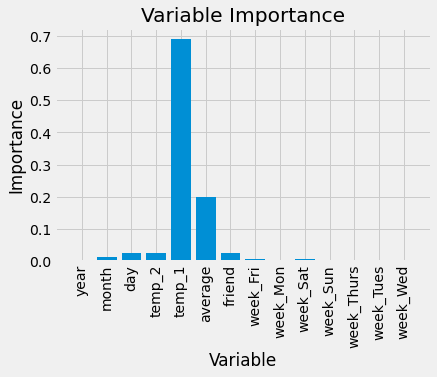

In [37]:
##List of x locations for plotting
x_values = list(range(len(importance)))

##Bar chart
plt.bar(x_values, importance, orientation='vertical')

##Tick labels for x axis
plt.xticks(x_values, feature_list,rotation='vertical')

##Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importance')

## Predictions and Actual Values

In [40]:
##Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

##list and convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

##Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

##Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]

##Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

##Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

##Dataframe with Predictions and Dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

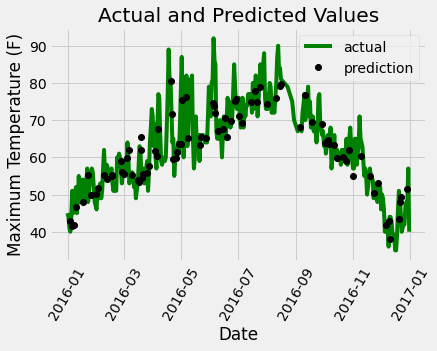

In [44]:
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'g-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ko', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

## Targets and Data Visualization

In [45]:
##Make the data accessible for plotting
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]

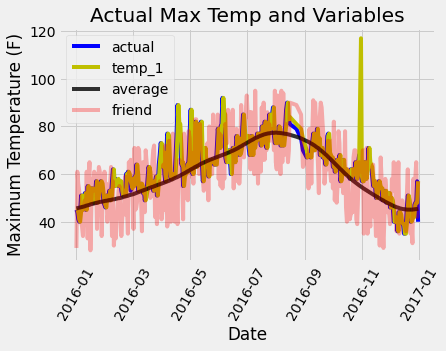

In [49]:
# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)

# Formatting plot
plt.legend(); plt.xticks(rotation = '60');

# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');